<a href="https://colab.research.google.com/github/kaliappan01/Exploring_ML_models/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
dataset = load_breast_cancer()
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['Benign'] = pd.DataFrame(dataset.target)

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(dataset.data,dataset.target,stratify = dataset.target,test_size = 0.3, shuffle = True, random_state = 144)

In [ ]:
y_train[y_train==0].size/y_train.size , y_test[y_test==0].size/y_test.size

(0.37185929648241206, 0.3742690058479532)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 3 )
KNN.fit(X_train,y_train)
pred = KNN.predict(X_test)
print("Model accuracy score : ",KNN.score(X_test,y_test))

Model accuracy score :  0.9181286549707602


In [ ]:
from sklearn.metrics import roc_curve, auc
def plot_roc(y_test, pred):
  fpr, tpr, _ = roc_curve(y_test,  pred)
  plt.plot(fpr,tpr)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  print("AUC SCORE : ",auc(fpr, tpr))


AUC SCORE :  0.9031834112149533


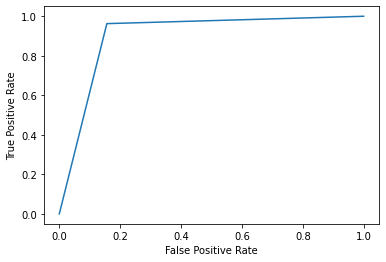

In [ ]:
plot_roc(y_test, pred)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

stdscl = StandardScaler()
minmaxscl = MinMaxScaler()

In [ ]:
X_train_std = stdscl.fit_transform(X_train)
X_test_std = stdscl.transform(X_test)
X_train_mm = minmaxscl.fit_transform(X_train)
X_test_mm = minmaxscl.transform(X_test)

In [ ]:
def choose_k(X_train,X_test):
  train_acc,test_acc = [],[]
  for k in range(1,12):
    KNN = KNeighborsClassifier(n_neighbors= k)
    KNN.fit(X_train,y_train)
    train_acc.append(KNN.score(X_train, y_train))
    test_acc.append(KNN.score(X_test, y_test))
  return train_acc,test_acc

In [ ]:
train_std, test_std =choose_k(X_train_std, X_test_std)
train_mm, test_mm = choose_k(X_train_mm, X_test_mm)

In [97]:
def plot_train_test_acc_k(k, train, test):
  k = range(1,12)
  max_train_acc = max(train)
  max_test_acc = max(test)
  plt.plot(k, test, label = "test_accuracy")
  plt.plot(k, train, label = "train_accuracy")
  plt.plot(test.index(max_test_acc)+1,max_test_acc,'go')
  plt.xlabel("No of neighbors")
  plt.ylabel("Accuracy")
  plt.legend()

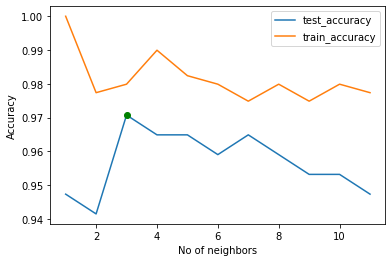

In [98]:
plot_train_test_acc_k(range(1,11),train_std,test_std)

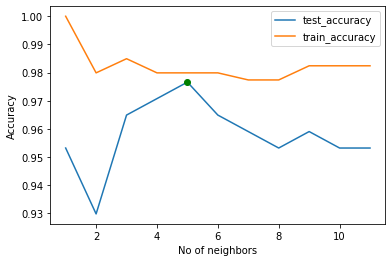

In [99]:
plot_train_test_acc_k(range(1,11),train_mm,test_mm)

k = 5 with minmax scaler gives best result 